# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

## 2 - Precission

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128`. Explain the error slopes. 

In [3]:
# Import libraries and define functions 
import numpy as np
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm

def h(x): 
    """ 
    Solves the function h(x) from equation 1) 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        Spatial evolution of the function h(x) 
    """
    return np.cos(np.pi*(x-1) / 2) * np.exp(-((x-3) / 2.5)**2)

def hp_calc(x): 
    """ 
    Solves derivative of the function h(x) from equation 1) using the analytical 
    solution obtained from wolframalpha.com/ 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        The derivative of the function h(x) 
    """
    return np.exp(-0.16*(-3+x)**2)  *(1.5708*np.cos((np.pi*x)/2) - (-0.96 + 0.32*x) * np.sin((np.pi*x)/2))

def calc_error(x): 
    """ 
    Calculates the maximum of the absolute value of the error 
    Requires
    ----------
    Some spatial function hp_calc(x)

    Parameters 
    ----------
    x : `array`
        Spatial axis. 

    Returns
    -------
    error `array`
        The maximum of the abs error 
    """
    hp = nm.deriv_dnw(x, h(x))[:-1]
    hp_calc_ = hp_calc((x + (x[1]-x[0])/2)[:-1]) 

    # Take the difference between numerical and analytical derivatives 
    error = np.max(np.abs(hp_calc_ - hp))
    return error

In [7]:
# 32 
nint =  [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 1e6, 3e6]
error_list_32 = []
x0 = np.float32(-4.0)
xf = np.float32(10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list_32.append(np.float32(calc_error(np.float32(xx))))

# 64 
error_list_64 = []
x0 = (-4.0)
xf = (10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list_64.append(calc_error(np.float64(xx)))

# 128 
error_list_128 = []
x0=np.float128(-4.0)
xf=np.float128(10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-np.float128(1.0)) * (xf-x0) + x0

    error_list_128.append(np.float128(calc_error(np.float128(xx))))

In [8]:
p_32  = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list_32[:-3]), deg=1))
p_64  = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list_64[:-3]), deg=1))
# p_128 = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list_128[:-3]), deg=1))

# print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_32)/len(error_list_32) - p_32.coef[0]):.1e}")
# print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_64)/len(error_list_64) - p_64.coef[0]):.1e}")
# print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_128)/len(error_list_128) - p_128.coef[0]):.1e}")

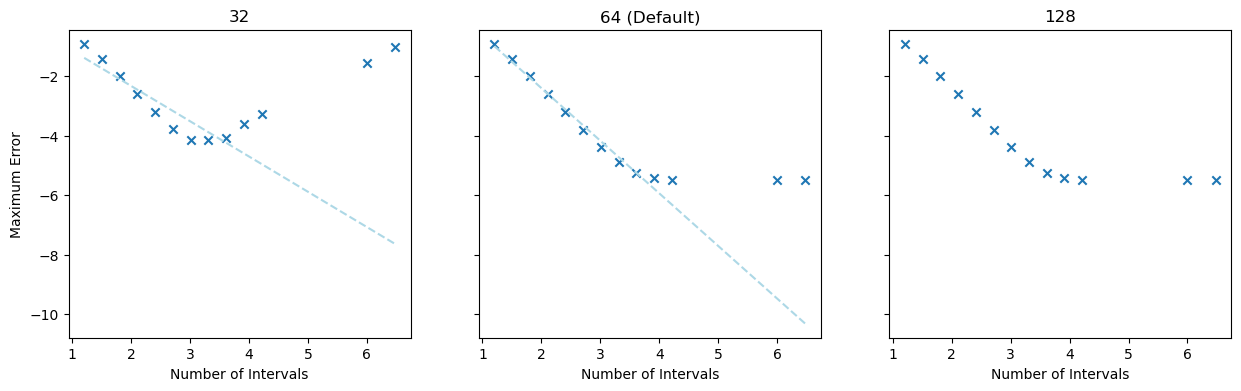

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

ax1.scatter(np.log10(nint), np.log10(np.float32(error_list_32)), marker='x')
ax1.plot(np.log10(nint), p_32(np.log10(nint)), color='lightblue', linestyle='--')
ax1.set_xlabel("Number of Intervals"); ax1.set_ylabel("Maximum Error")
ax1.title.set_text(f'32')

ax2.scatter(np.log10(nint), np.log10(np.float32(error_list_64)), marker='x')
ax2.plot(np.log10(nint), p_64(np.log10(nint)), color='lightblue', linestyle='--')
ax2.set_xlabel("Number of Intervals")
ax2.title.set_text(f'64 (Default)')
# ax2.set_xscale('log')

ax3.scatter(np.log10(nint), np.log10(np.float32(error_list_128)), marker='x')
ax3.set_xlabel("Number of Intervals")
ax3.title.set_text(f'128')

<span style="color:pink">
Using the same method as we did in `ex_1a_v0.5.ipynb`, we plot the error for floating points 32, 64 (the default also used in the previous task) and 128. For floating point 32, the error begins to increase again due to the number of floating points no longer being resolved. This happens for a lower number of intervals than for the floating points 64 and 128, where we cannot see the error increasing. 
For floating point 128 the error remains similar to that of the default. 
</span>

<span style="color:green">JMS</span>.

<span style="color:red"> You need to make sure that the input xx, hh etc are in float 32, 63 etc. This should produce a clear difference between 32 and 64 cases at least. </span>.